In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, encoding_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [4]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [5]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0236 - val_loss: 0.0089
Epoch 2/20
1875/1875 [==============================] - 2s 934us/step - loss: 0.0068 - val_loss: 0.0053
Epoch 3/20
1875/1875 [==============================] - 2s 928us/step - loss: 0.0050 - val_loss: 0.0045
Epoch 4/20
1875/1875 [==============================] - 2s 954us/step - loss: 0.0045 - val_loss: 0.0043
Epoch 5/20
1875/1875 [==============================] - 2s 885us/step - loss: 0.0043 - val_loss: 0.0041
Epoch 6/20
1875/1875 [==============================] - 2s 946us/step - loss: 0.0042 - val_loss: 0.0040
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 9/20
1875/1875 [==============================] - 2s 942us/step - loss: 0.0040 - val_loss: 0.0039
Epoch 10/20
1875/1875 [==============================] - 2s 926us/step

In [6]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 64)                50240     
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28)            50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [7]:
autoencoder.save('saved_model/tf_mnist_auto_2')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/tf_mnist_auto_2\assets


In [30]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

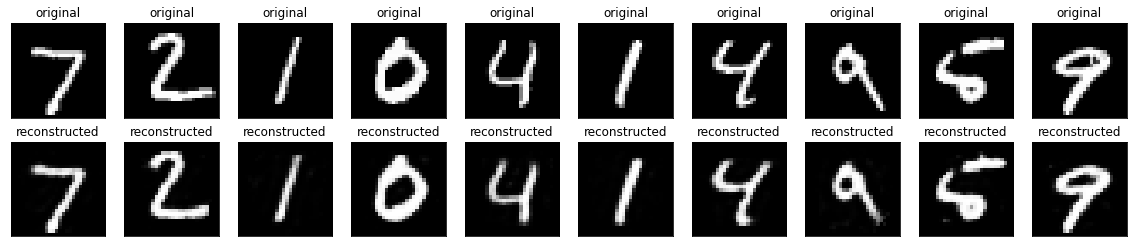

In [31]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [32]:
# conv_autoencoder 예시

In [33]:
(x_train, _), (x_test, _) = mnist.load_data()

In [34]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


In [35]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28,1)), 
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

conv_autoencoder = Denoise()

In [36]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [37]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 10/10
1875/1875 [==============================] - 2s 976us/step - loss: 0.0

In [38]:
encoded_imgs = conv_autoencoder.encoder(x_test).numpy()
decoded_imgs = conv_autoencoder.decoder(encoded_imgs).numpy()

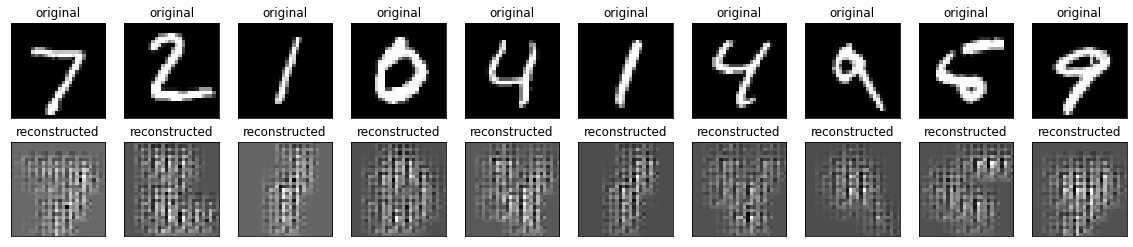

In [39]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()